<a href="https://colab.research.google.com/github/anadiedrichs/curso-aprendizaje-automatico/blob/main/Preprocesamiento_Titanic_Descarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧹 Limpieza y Preprocesamiento de Datos

Este notebook introduce conceptos clave para preparar un conjunto de datos antes de entrenar un modelo de aprendizaje automático. Usaremos el dataset de Titanic como ejemplo.

## 🔍 Descarga y exploración del dataset

In [ ]:
import pandas as pd

# Descargar el dataset desde una fuente pública
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
url = "https://raw.githubusercontent.com/fernandoabcampos/titanic-data-cleaning-and-validation/refs/heads/master/train.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El dataset del Titanic contiene información sobre los pasajeros del naufragio. Las columnas del dataset y su significado son los siguientes:

* PassengerId: Identificador único para cada pasajero.
* Survived: Indica si el pasajero sobrevivió (1) o no (0). Este es el campo que se utiliza para predecir o estimar si alguien sobrevive o no.
* Pclass: Clase del pasajero (1 para Primera Clase, 2 para Segunda Clase, 3 para Tercera Clase).
* Name: Nombre del pasajero.
* Sex: Género del pasajero (male o female).
* Age: Edad del pasajero.
* SibSp: Número de hermanos o cónyuges a bordo.
* Parch: Número de padres o hijos a bordo.
* Ticket: Número de billete del pasajero.
* Fare: Tarifa pagada por el pasajero.
* Cabin: Letra y número de la cabina del pasajero.
* Embarked: Puerto de embarque del pasajero (C para Cherburgo, Q para Queenstown, S para Southampton).

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##  🚫 Manejo de valores nulos

In [ ]:
# Ver cuántos valores nulos hay en cada columna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.loc[df['Age'] == 0,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df['Age'].median()

28.0

In [ ]:
# Imputación de la edad con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())



In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:

# Rellenar 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:

# Verificar que no queden nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## 📊 Detección y tratamiento de datos atípicos

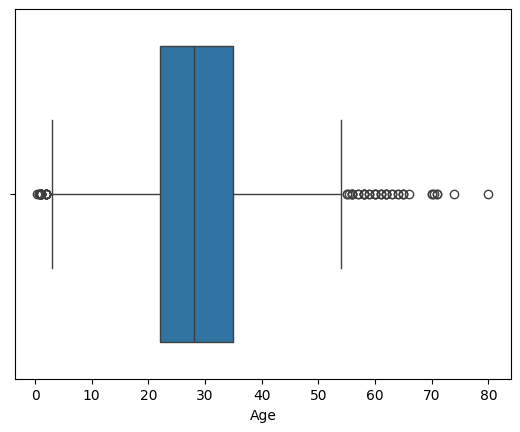

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos boxplot para detectar outliers en edad
sns.boxplot(x=df['Age'])
plt.show()


In [ ]:

# Eliminamos outliers basados en IQR
# Q1 = df['Age'].quantile(0.25)
# Q3 = df['Age'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['Age'] >= Q1 - 1.5 * IQR) & (df['Age'] <= Q3 + 1.5 * IQR)]

## ⚖️ Normalización y estandarización

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalización
scaler = MinMaxScaler()
df['Fare_normalized'] = scaler.fit_transform(df[['Fare']])

# Estandarización
scaler_std = StandardScaler()
df['Age_standardized'] = scaler_std.fit_transform(df[['Age']])

## 🔡 Codificación de variables categóricas

In [ ]:
# One-hot encoding para 'Sex' y 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_normalized,Age_standardized,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.014151,-0.565736,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.139136,0.663861,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.015469,-0.258337,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.103644,0.433312,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.015713,0.433312,True,False,True


## 📋 Selección de variables

In [ ]:

# Drop the 'Name' and 'Ticket' columns
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin','Age','Fare'], axis=1)

# Display the updated DataFrame
df.head()


,Survived,Pclass,SibSp,Parch,Fare_normalized,Age_standardized,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,0.014151,-0.565736,True,False,True
1,1,1,1,0,0.139136,0.663861,False,False,False
2,1,3,0,0,0.015469,-0.258337,False,False,True
3,1,1,1,0,0.103644,0.433312,False,False,True
4,0,3,0,0,0.015713,0.433312,True,False,True


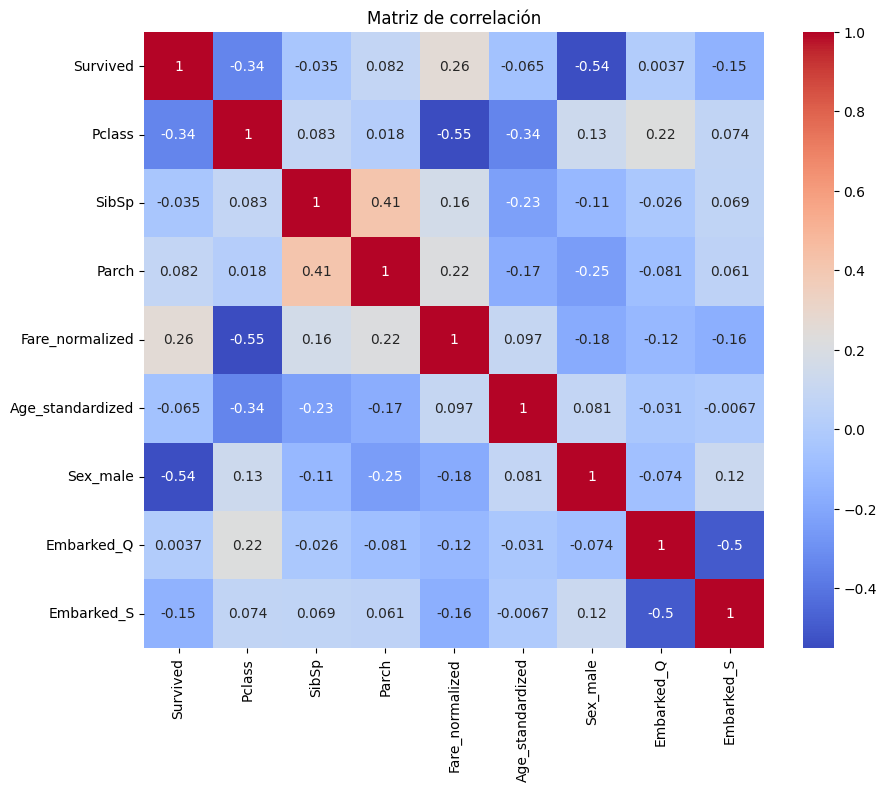

In [ ]:
# Correlación de variables numéricas
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## 🧪 Ejercicio final

1. Elimina las filas con valores nulos restantes, si existen.
2. Aplica normalización a la columna `Fare` y estandarización a `Age`.
3. Realiza one-hot encoding sobre las columnas categóricas `Pclass` y `Embarked`.
4. Identifica variables altamente correlacionadas y elige las más relevantes para entrenar un modelo predictivo (por ejemplo, predecir `Survived`).